Bom, no notebook sobre o Perceptron([link](https://github.com/raphael720/DeepLearning/blob/main/redes%20neurais%20de%20uma%20camada/Perceptron.ipynb)) foi apresentado como ele aprende e como pode ser utilizado tanto para classificação binária quanto para regressão linear. Nesse notebook, nós veremos um algoritmo muito parecido com o Perceptron, mais conhecido como __Adaline__, que foi uma proposta de melhoria ao algoritmo original do Perceptron. Veremos as semelhanças e diferenças entre os dois algoritmos e iremos implementá-lo utilizando python e numpy. Por fim, vamos aplicar nos mesmos problemas de classificação do notebook do Perceptron para entender de fato suas diferenças. "mini-spoiler" __O código para utilizar o Adaline em problemas de regressão é exatamente o mesmo do perceptron__.

__Objetivos__:

- Diferenças entre os algoritmos do Perceptron e Adaline.
- Implementar o Adaline e seu modelo de aprendizado em Python puro e Numpy
- Utilizar o Adaline para classificação e regressão.

# Importações e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

%matplotlib inline

# Introdução

Poucos meses após a publicação do teorema da convergência do Perceptron por Rosenblatt, 
os engenheiros da Universidade de Stanford, Bernard Widrow e Marcian Hoff, 
publicaram um trabalho descrevendo uma rede neural muito parecida com o Perceptron, 
a __Adaline__ (do inglês _ADAptive LINear Element_). Porém, ao invés de utilizar a 
função _step_ como função de ativação, a __Adaline utiliza função de ativação linear e 
tem uma nova regra de aprendizado supervisionado__, conhecida como __regra de Widrow-Hoff__ (ou __regra delta__, 
ou ainda __regra LMS__). 

De fato, tanto o Perceptron quanto o Adaline possuem muitas características semelhantes e __é comum ver o pessoal confundindo o Perceptron com o Adaline__. Entre as principais semelhanças, podemos destacar:
- Ambos possuem __apenas um neurônio de N entradas e apenas uma saída. Não há camadas escondidas__.
- Ambos são __classificadores lineares binários__ por definição, mas podemos adaptá-los para efetuar __regressão linear__, da mesma forma como visto no notebook sobre o Perceptron. __Na verdade, o código para treinar um Adaline para regressão é o mesmo de um Perceptron__.
- Ambos tem o **método de aprendizagem _online_**. Ou seja, a atualização dos pesos é efetuada amostra por amostra.
- Ambos tem uma **função _step_ para classificação**. Porém, ao contrário do Perceptron, __na Adaline ela não é utilizada na atualização dos pesos__. Sera mostrado por quê a seguir.

Bom, a principal diferença entre o Perceptron e a Adaline é que o Perceptron utiliza os labels das classes para fazer a atualização dos pesos, enquanto __a Adaline utiliza o resultado da função de ativação (linear) como valor contínuo de predição__. Isto é, ao invés da saída ser discreta como no Perceptron (0 ou 1), __na Adaline a saída pode ser qualquer valor contínuo__. Essa diferença fica mais clara quando vemos a figura a seguir:

<img src="../imagens/comparacao_perceptron_adaline.png">


Repare, como dito, que ambos têm a função _step_. No Perceptron, ela é utilizada como função de ativação. No Adaline, por sua vez, a função de ativação é linear e a funcão _step_ é só utilizada para gerar a predição. 

Por calcular a saída como um valor contínuo, __muitos consideram o Adaline mais poderoso__, uma vez que a diferença entre a saída desejada e o valor predito ($y_i - \widehat{y}_i$) nos diz agora "o quanto estamos certos ou errados". __Na prática, isso faz com o que o Adaline tente encontrar a "melhor solução" para o problema, ao invés de somente uma "solução adequada"__. Tomando como exemplo a figura abaixo, o Perceptron pode encontrar diversas retas que separam as classes, enquanto o Adaline tenta encontrar a melhor reta que separa as classes.

<img src="../imagens/hiperplanos_perceptron_adaline.png" width='700'>

Ok, mas como isso muda o aprendizado? É o que veremos a seguir.

# Regra de Aprendizagem do Adaline

A atualização dos pesos do Adaline é dada pela mesma fórmula do Perceptron:

$$w_i = w_i + \lambda(y_i - \widehat{y}_i)x_i$$

Onde $\lambda$ é a __taxa de aprendizagem__.

Mas você já imaginou da onde vem essa fórmula? Em primeiro lugar, o método de atualização dos pesos é baseado na __Regra Delta__ (*Delta Rule*). Sendo $\overrightarrow{w} = \{w_1, w_2, ..., w_D\}$, a atualização dos pesos é dada por:

$$\overrightarrow{w} = \overrightarrow{w} - \Delta{\overrightarrow{w}}$$

em que:

$$\Delta{\overrightarrow{w}} = \lambda\nabla E(\overrightarrow{w})$$

Sendo $\nabla E(\overrightarrow{w})$ o gradiente de uma função que depende de $\overrightarrow{w}$ e que queremos minimizar.

No caso do Adaline, __a função de custo é dada pela soma dos erros quadrados__:

$$J(w) = \frac{1}{2}\sum_{i}^N (y_i - \widehat{y}_i)^2$$

Onde $N$ é a quantidade de amostras nos dados, e as demais variáveis representam as mesmas vistas anteriormente. Repare que a função de custo é quase uma _Mean Squared Error (MSE)_, só que ao invés de dividir por $N$, estamos dividindo por 2 o resultado do somatório. O por quê disso será entendido mais a frente na demonstração.

Queremos encontrar, então, o vetor $\overrightarrow{w}$ que minimiza a função $J$. Assim, temos:

$$\frac{\partial J}{\partial w_i} = \frac{\partial}{\partial w_i}\frac{1}{2}\sum_i^N (y_i - \widehat{y}_i)^2$$

Como a derivada do somatório é igual ao somatório das derivadas:

$$= \frac{1}{2}\sum_i^N \frac{\partial}{\partial w_i}(y_i - \widehat{y}_i)^2$$

Aplicando a regra da cadeia:

$$= \sum_i^N (y_i - \widehat{y}_i)\frac{\partial}{\partial w_i}(y_i - \widehat{y}_i)$$

Repare que, quando derivamos $(y_i - \widehat{y}_i)^2$, o expoente 2, ao sair do somatório, foi multiplicado por $\frac{1}{2}$, tornando-o 1. Isso é o que os matemáticos denominam de "conveniência matemática". 

Como $\widehat{y}_i = x_iw_i + b$ é uma função que depende de $w$, e sua derivada em relação a $w_i$ é apenas $x_i$, temos que:

$$\frac{\partial J}{\partial w_i} = \sum_i^N (y_i - \widehat{y}_i)(-x_i)$$
$$\frac{\partial J}{\partial w_i} = -\sum_i^N (y_i - \widehat{y}_i)x_i$$

$$\frac{\partial J}{\partial \overrightarrow{w}} = -(\overrightarrow{y} - \overrightarrow{\widehat{y}_i})\overrightarrow{x}$$

De maneira análoga, podemos calcular que a derivada de $J$ em relação a $b_i$ é:

$$\frac{\partial J}{\partial b_i} = -\sum_i^N (y_i - \widehat{y}_i)*1.0$$

Já que a derivada de $\widehat{y}_i$ em relação a $b_i$ ($\frac{\partial J}{\partial b_i}$) é igual a 1.0. Logo, a atualização dos bias será dada por:

$$b_i = b_i + \lambda(y_i - \widehat{y}_i)$$

# Regressão

Aplicando o adaline para o mesmo problema de regressão do perceptron 

In [7]:
df = pd.read_csv('../data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [8]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values.reshape(-1, 1)

print(x.shape, y.shape)

(25, 3) (25, 1)


In [9]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [10]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-2

for step in range(2001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: [507686.86378228]
step 200: [175.27880595]
step 400: [148.45375936]
step 600: [146.40957772]
step 800: [146.18220678]
step 1000: [146.1544012]
step 1200: [146.1510458]
step 1400: [146.1506826]
step 1600: [146.15065959]
step 1800: [146.15066502]
step 2000: [146.15066871]
w:  [array([8.72520351]), array([14.13948324]), array([26.32050812])]
b:  [150.71119309]


### Observação:
- como ja foi falado, quando se trata de regressão o código do adaline é identico ao do perceptron

# Classificação

(100, 2) (100,)


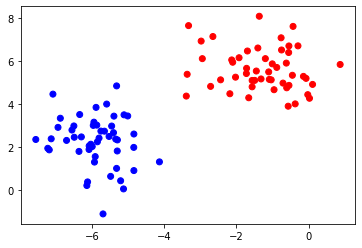

In [11]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [12]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh < 0.5, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

In [19]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-3

for step in range(1501):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 432.95200770576884
step 100: 5.447500709638988
step 200: 3.6772410500873285
step 300: 2.846806852984668
step 400: 2.457387352927127
step 500: 2.274870795907397
step 600: 2.18939304582569
step 700: 2.149406460056879
step 800: 2.130731668960143
step 900: 2.122031349510743
step 1000: 2.1179926657260633
step 1100: 2.1161280405155334
step 1200: 2.115274178687677
step 1300: 2.1148880630566347
step 1400: 2.1147168972441763
step 1500: 2.114643462831579
w:  [0.14226081652508835, 0.07814648937459058]
b:  0.6971019754063993


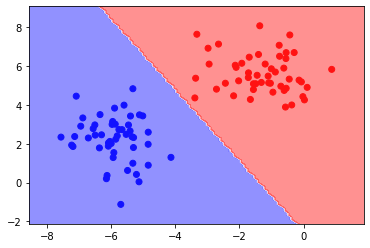

In [20]:
plot_linear_classifier(x, y, w, b)

### Numpy

In [23]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1

learning_rate = 1e-3

for step in range(1501):
    cost = 0
    for x_n, y_n in zip(x,y):
        y_pred = np.dot(x_n, w) + b
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + error*learning_rate
        cost += error**2
        
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 313.0589840124953
step 100: 3.3063988643149504
step 200: 2.672886105619442
step 300: 2.3758589701106443
step 400: 2.2366793239759435
step 500: 2.1715205859058715
step 600: 2.141055116249628
step 700: 2.126837843273858
step 800: 2.120221729408098
step 900: 2.117155718937957
step 1000: 2.1157437623192132
step 1100: 2.1150996934152833
step 1200: 2.1148102047973194
step 1300: 2.114683125055428
step 1400: 2.114629512513201
step 1500: 2.1146084866449373
w:  [0.14246029 0.07788381]
b:  0.6989483062788994


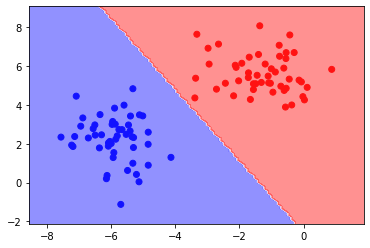

In [24]:
plot_linear_classifier(x, y, w, b)